# 머신러닝 예제로 학습하기

##데이터 불러오고 전처리 하기

In [1]:
#데이터 불러오고 전처리 하기
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#데이터 요약
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
#문제: 처음부터 800번 까지 데이터를 학습 데이터로 이용하고, 나머지 기초데이터를 테스트로 이용하여 모델간의 변화를 비교해 보기

train_df = df[:800]
test_df = df[800:]

In [7]:
print(len(train_df))
print(len(test_df))

800
91


In [8]:
##pclass와 생존의 관계 = 결과값: 관계 있음
train_df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.615385
1,2,0.481928
2,3,0.246014


In [9]:
##성별과 생존의 관계 = 결과값: 관계 있음
train_df[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.745583
1,male,0.187621


In [10]:
##부모-자녀관계와 생존의 관계 = 결과값: 관계 적음
train_df[['parch', 'survived']].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
2,2,0.527778
1,1,0.514851
3,3,0.500000
0,0,0.350163
5,5,0.250000
4,4,0.000000
6,6,0.000000


In [11]:
##형제와 생존의 관계 = 결과값: 관계 적음
train_df[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.518325
2,2,0.481481
0,0,0.348708
3,3,0.266667
4,4,0.200000
5,5,0.000000
6,8,0.000000


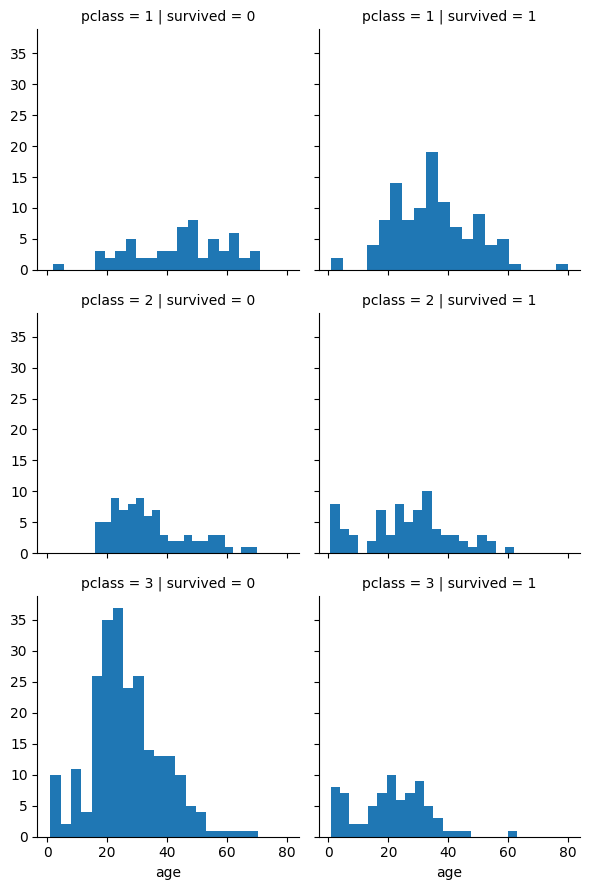

In [12]:
##pclass에 따른 생존률 비교
a = sns.FacetGrid(train_df, col='survived', row = 'pclass')
a.map(plt.hist, 'age', bins=20)

In [13]:
#필요없는 필드 삭제
names = train_df.columns
print(names)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [14]:
train_df = train_df.drop(names[4:], axis= 1)
test_df = test_df.drop(names[4:], axis= 1)

In [15]:
train_df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [16]:
test_df.head()

,survived,pclass,sex,age
800,0,2,male,34.00
801,1,2,female,31.00
802,1,1,male,11.00
803,1,3,male,0.42
804,1,3,male,27.00


In [17]:
#결측치 확인
print(train_df.isnull().sum())
print(test_df.isnull().sum())

survived      0
pclass        0
sex           0
age         163
dtype: int64
survived     0
pclass       0
sex          0
age         14
dtype: int64


In [18]:
#결측치 평균값으로 채우기
train_df['age'] = train_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))
test_df['age'] = test_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))

In [19]:
#결측치 확인
print(train_df.isnull().sum())
print(test_df.isnull().sum())

survived    0
pclass      0
sex         0
age         0
dtype: int64
survived    0
pclass      0
sex         0
age         0
dtype: int64


In [20]:
#성별 인코딩
map_dict = {'female': 0, 'male': 1}

train_df['sex'] = train_df['sex'].map(map_dict).astype(int)
test_df['sex'] = test_df['sex'].map(map_dict).astype(int)

In [21]:
train_df.head()

,survived,pclass,sex,age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [22]:
#나이 분류

def f1(x):
    if x < 20:
        return 1
    elif x < 40:
        return 2
    elif x < 60:
        return 3
    else:
        return 4

In [23]:
train_df['age'] = train_df['age'].apply(f1)
test_df['age'] = test_df['age'].apply(f1)

In [24]:
test_df.head()

,survived,pclass,sex,age
800,0,2,1,2
801,1,2,0,2
802,1,1,1,1
803,1,3,1,1
804,1,3,1,2


##머신러닝 모델 구성 및 결과 검증

In [25]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [26]:
#데이터 분류
X_train = train_df.drop(['survived'], axis = 1) #이건 들어올 데이터
Y_train = train_df['survived'] #이건 데이터 답안
X_test = test_df.drop(['survived'], axis = 1)
Y_test = test_df['survived']

In [27]:
#모델 생성 및 학습 Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [28]:
#모델 정확도 검증
print(decision_tree.score(X_train, Y_train))
print(decision_tree.score(X_test, Y_test))

0.8
0.7692307692307693


In [29]:
Y_pred = decision_tree.predict(X_test)
print(Y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0]


In [30]:
Y_test_list = list(Y_test)

total = 0
for i in range(len(Y_pred)):
    if Y_pred[i] == Y_test_list[i]:
        total += 1
    else:
        pass

print(total) # 맞은 횟수 91번 중에 70번 맞음
print(total/len(Y_pred)) #정확도

70
0.7692307692307693


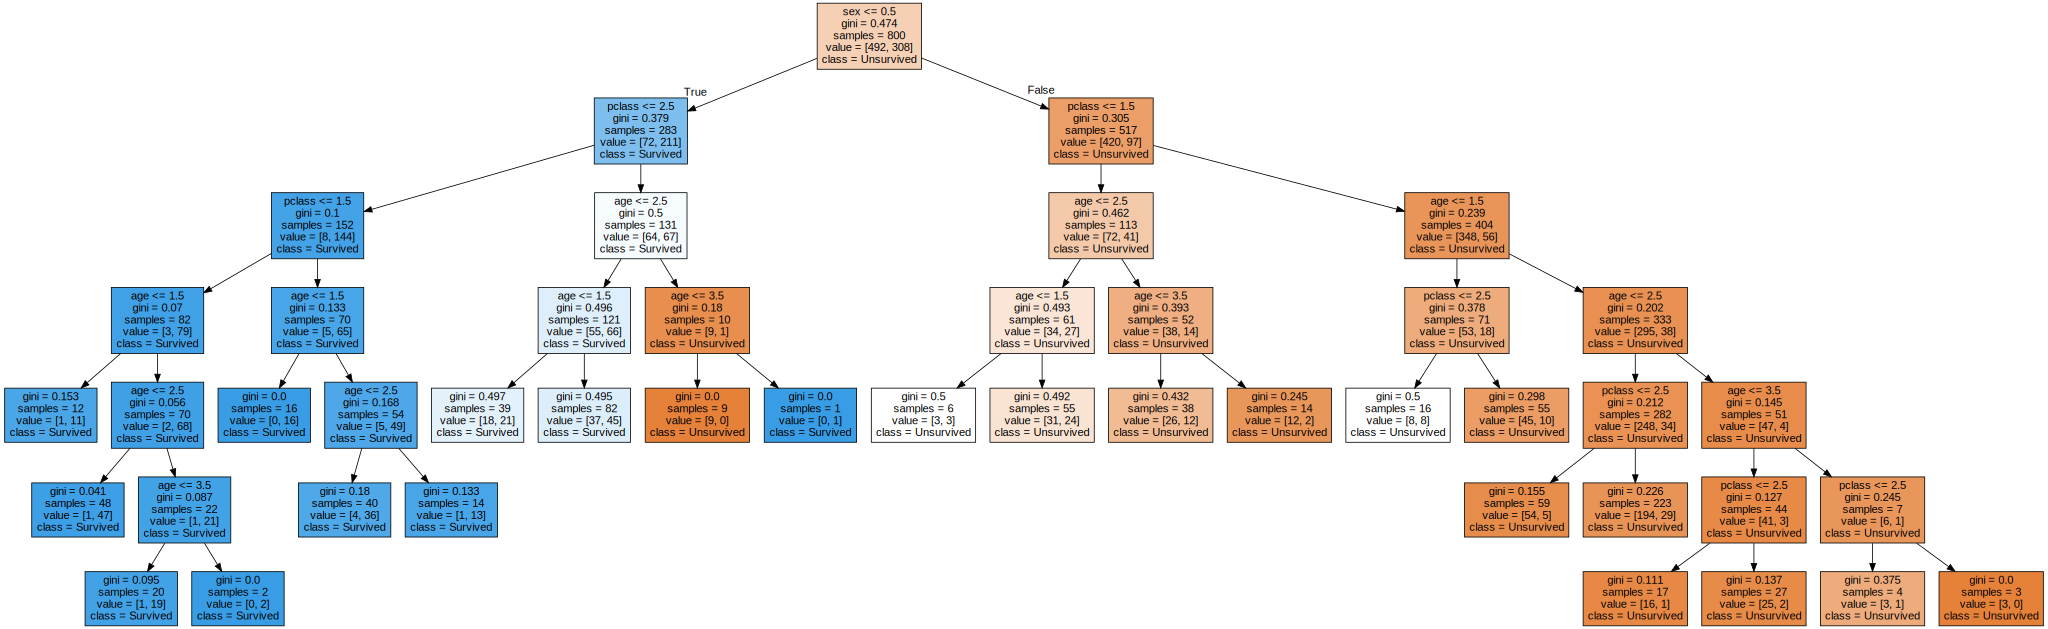

In [31]:
#데이터 모델의 출력: 구조 시각화

from sklearn.tree import export_graphviz

export_graphviz(
    decision_tree,
    out_file = 'titanic.dot',
    feature_names= ['pclass', 'sex', 'age'],
    class_names= ['Unsurvived', 'Survived'],
    filled=True #색 넣어 주는 것
    )

import graphviz
f = open('titanic.dot')
dot_graph = f.read()

dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename = 'tatanic tree')
dot

#다양한 머신러닝 기법

In [32]:
#데이터 불러오고 전처리 하기
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')

train_df = df[:800]
test_df = df[800:]

#필요없는 필드 삭제
names = train_df.columns
print(names)

train_df = train_df.drop(names[4:], axis= 1)
test_df = test_df.drop(names[4:], axis= 1)

#결측치 평균값으로 채우기
train_df['age'] = train_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))
test_df['age'] = test_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))

#성별 인코딩
map_dict = {'female': 0, 'male': 1}
train_df['sex'] = train_df['sex'].map(map_dict).astype(int)
test_df['sex'] = test_df['sex'].map(map_dict).astype(int)

#나이 분류
def f1(x):
    if x < 20:
        return 1
    elif x < 40:
        return 2
    elif x < 60:
        return 3
    else:
        return 4

train_df['age'] = train_df['age'].apply(f1)
test_df['age'] = test_df['age'].apply(f1)

#데이터 분류
X_train = train_df.drop(['survived'], axis = 1) #이건 들어올 데이터
Y_train = train_df['survived'] #이건 데이터 답안
X_test = test_df.drop(['survived'], axis = 1)
Y_test = test_df['survived']

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [33]:
#모델 생성 및 학습 Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

#모델 정확도 검증
print(decision_tree.score(X_train, Y_train))
print(decision_tree.score(X_test, Y_test))

0.8
0.7692307692307693


##배깅: 랜덤포레스트

In [35]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

print(random_forest.score(X_train, Y_train))
print(random_forest.score(X_test, Y_test))

0.8
0.7802197802197802


##부스팅